In [228]:
# https://www.kaggle.com/code/aguilarhenry/disney-eda/notebook

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv('disney_plus_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [192]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [193]:
df.shape

(1450, 12)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [195]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [196]:
df['country'] = df.country.fillna(df['country'].mode())

In [197]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         218
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [198]:
# for Country
df['country'] = df['country'].fillna(df['country'].mode()[0])



In [199]:
# to replace with 'No Data'
toReplace = ['cast', 'director']
def replaceWith(df, a, b):
    """replaces missing values in the columns inside list a, with the value b"""
    for column in a:
        df[column].replace(np.nan, b, inplace = True)
replaceWith(df, toReplace, 'No Data')

In [200]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          3
duration        0
listed_in       0
description     0
dtype: int64

In [201]:
df = df.dropna()

In [202]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [203]:
df.shape

(1444, 12)

In [204]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


# fetch data John cherry director

In [205]:
df[df['director']=='John Cherry']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


# count plot on type 

In [206]:
df['type'].value_counts()

Movie      1051
TV Show     393
Name: type, dtype: int64

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

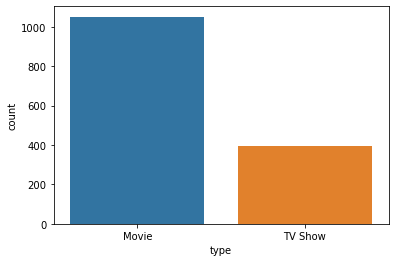

In [207]:
sns.countplot(df['type'])

# from country get United states

In [208]:
df.groupby('country').get_group('United States')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,s1437,Movie,The Great Mouse Detective,"John Musker, Ron Clements, Dave Michener","Vincent Price, Barrie Ingham, Val Bettin, Susa...",United States,"October 1, 2019",1986,G,75 min,"Animation, Family, Mystery",A super-sleuth mouse must solve a toy maker's ...
1437,s1438,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1438,s1439,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1443,s1444,Movie,Aquamarine,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan,...",United States,"August 13, 2021",2006,PG,104 min,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...


In [209]:
df.query("country == 'United States'")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,s1437,Movie,The Great Mouse Detective,"John Musker, Ron Clements, Dave Michener","Vincent Price, Barrie Ingham, Val Bettin, Susa...",United States,"October 1, 2019",1986,G,75 min,"Animation, Family, Mystery",A super-sleuth mouse must solve a toy maker's ...
1437,s1438,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1438,s1439,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1443,s1444,Movie,Aquamarine,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan,...",United States,"August 13, 2021",2006,PG,104 min,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...


In [210]:
df[df['country'] == 'United States']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,s1437,Movie,The Great Mouse Detective,"John Musker, Ron Clements, Dave Michener","Vincent Price, Barrie Ingham, Val Bettin, Susa...",United States,"October 1, 2019",1986,G,75 min,"Animation, Family, Mystery",A super-sleuth mouse must solve a toy maker's ...
1437,s1438,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1438,s1439,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1443,s1444,Movie,Aquamarine,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan,...",United States,"August 13, 2021",2006,PG,104 min,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...


# show on graph more movies released 

In [211]:
a = df['release_year'].value_counts().head(10)
a

2021    123
2020    114
2019     98
2017     69
2018     65
2016     60
2011     52
2014     49
2015     46
2012     41
Name: release_year, dtype: int64

In [212]:
b = df['release_year'].value_counts()
b = b[:10]

In [213]:
a.index

Int64Index([2021, 2020, 2019, 2017, 2018, 2016, 2011, 2014, 2015, 2012], dtype='int64')

In [214]:
a.values

array([123, 114,  98,  69,  65,  60,  52,  49,  46,  41], dtype=int64)

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'top 10  Year vs Count')

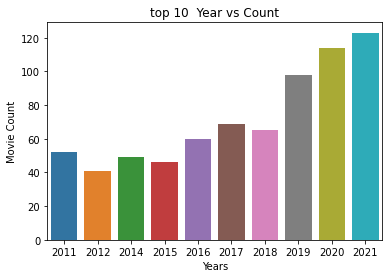

In [215]:
sns.barplot(a.index,a.values)
plt.xlabel('Years')
plt.ylabel('Movie Count')
plt.title('top 10  Year vs Count')

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'top 10  Year vs Count')

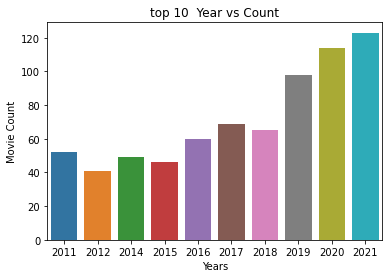

In [216]:
sns.barplot(b.index,b.values)
plt.xlabel('Years')
plt.ylabel('Movie Count')
plt.title('top 10  Year vs Count')

# get the highest duration movie

In [217]:
df['duration'].unique()

array(['23 min', '91 min', '41 min', '94 min', '1 Season', '2 Seasons',
       '45 min', '59 min', '4 min', '10 Seasons', '2 min', '1 min',
       '8 min', '3 Seasons', '110 min', '11 min', '7 min', '95 min',
       '129 min', '14 min', '5 min', '134 min', '9 min', '30 min',
       '6 min', '22 min', '3 min', '87 min', '90 min', '93 min',
       '101 min', '132 min', '44 min', '131 min', '104 min', '5 Seasons',
       '52 min', '47 min', '53 min', '85 min', '92 min', '135 min',
       '4 Seasons', '105 min', '99 min', '32 Seasons', '88 min',
       '127 min', '106 min', '116 min', '42 min', '16 Seasons', '140 min',
       '19 Seasons', '66 min', '115 min', '137 min', '9 Seasons',
       '126 min', '82 min', '125 min', '54 min', '7 Seasons', '98 min',
       '102 min', '80 min', '170 min', '97 min', '112 min', '21 min',
       '20 min', '15 min', '19 min', '79 min', '6 Seasons', '89 min',
       '18 min', '81 min', '148 min', '121 min', '96 min', '109 min',
       '107 min', '86 min', '

In [218]:
df.pivot_table(index = ['duration'],aggfunc='max')

,cast,country,date_added,description,director,listed_in,rating,release_year,show_id,title,type
duration,,,,,,,,,,,
1 Season,"William Brent, Bradley Perry, Jake Short, Pari...","United States, Taiwan, South Korea, China, Jap...","September 8, 2021",“What If…?” flips the script on the MCU by rei...,No Data,Talk Show,TV-Y7-FV,2021,s993,Zombies: Addison's Moonstone Mystery,TV Show
1 min,No Data,United States,"November 12, 2021",“Baymax!” premieres on Disney+ summer 2022.,No Data,"Animation, Comedy, Coming of Age",TV-PG,2021,s38,The Proud Family: Louder and Prouder,Movie
10 Seasons,Mike Rowe,United States,"November 17, 2021","Meet Dr. Michelle Oakley, vet to pretty much e...",No Data,"Action-Adventure, Animals & Nature, Docuseries",TV-PG,2016,s217,Wicked Tuna,TV Show
10 min,"Walt Disney, Marcelite Garner, Sonny Dawson",United States,"November 12, 2019","The goddess of spring is kidnapped, bringing a...","Wilfred Jackson, Walt Disney","Fantasy, Musical, Thriller",TV-Y7,2019,s893,Toy Story Toons: Small Fry,Movie
100 min,"Zachary Gordon, Devon Bostick, Rachael Harris,...","United States, Canada","November 12, 2019",James Cameron teams up with NASA scientists to...,Vincent McEveety,"Drama, Family",TV-G,2011,s941,The Big Green,Movie
...,...,...,...,...,...,...,...,...,...,...,...
95 min,"Zendaya , Chanelle Peloso, Spencer Boldman, Em...","United States, United Kingdom","October 16, 2020","“Howard” is the untold story of Howard Ashman,...",Tom Jennings,"Drama, Family, Fantasy",TV-PG,2021,s962,Zapped,Movie
96 min,"Tom Hulce, Demi Moore, Tony Jay, Kevin Kline, ...","United States, France","November 12, 2019",Travel across the globe on a treasure hunt wit...,Steven Lisberger,Documentary,TV-G,2020,s945,Up,Movie
97 min,"Wilford Brimley, Warwick Davis, Aubree Miller,...","United States, United Kingdom, Australia","November 6, 2020",Zenon must thwart a villain's plot after she's...,William Dear,"Coming of Age, Musical, Science Fiction",TV-PG,2020,s926,Zenon: Girl of the 21st Century,Movie


In [219]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [220]:
df[df['listed_in']=='Animation']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
15,s16,Movie,Baymax!,No Data,No Data,United States,"November 12, 2021",2021,TV-G,1 min,Animation,“Baymax!” premieres on Disney+ summer 2022.
266,s267,Movie,Star Wars Vintage: Story of the Faithful Wookiee,No Data,No Data,United States,"April 2, 2021",2021,TV-Y7-FV,9 min,Animation,"With his friends ailing from a sleeping virus,..."


In [221]:
df['date_added'] = pd.to_datetime(df['date_added'])

C:\Users\Gayatri\AppData\Local\Temp/ipykernel_20044/2944776423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])


In [222]:
df['date_added']

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
5      2021-11-24
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1444, dtype: datetime64[ns]

In [223]:
df['month_added'] = df['date_added'].dt.month
df['month_added_name'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

C:\Users\Gayatri\AppData\Local\Temp/ipykernel_20044/2854676122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added'] = df['date_added'].dt.month
C:\Users\Gayatri\AppData\Local\Temp/ipykernel_20044/2854676122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added_name'] = df['date_added'].dt.month_name()
C:\Users\Gayatri\AppData\Local\Temp/ipykernel_20044/2854676122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [224]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_added_name,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,6,June,2021
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,4,April,2021
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",12,December,2020
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,9,September,2020


C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_added', ylabel='count'>

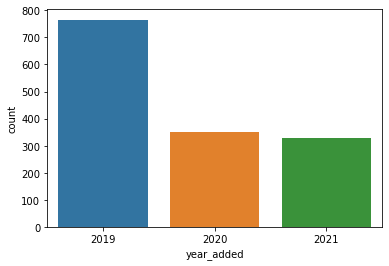

In [226]:
sns.countplot(df['year_added'])

In [227]:
df['year_added'].value_counts()

2019    765
2020    352
2021    327
Name: year_added, dtype: int64